In [1]:
import os
os.chdir(path='../')

import scanpy as sc
import matplotlib.pyplot as plt

import commot as ct

trial_name = "trial-Visium_FFPE_Human_Prostate_Cancer"
data_name = "Visium_FFPE_Human_Prostate_Cancer"

In [2]:
adata = sc.read_h5ad(f"{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 4371 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'STForte_Mask', 'leiden', 'region_refined'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_color_map', 'leiden_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [3]:
# Find highly variable genes for gene propagation
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor='seurat_v3')
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [4]:
adata_dis500_cellchat = adata.copy()
adata_dis500_cellphonedb = adata.copy()

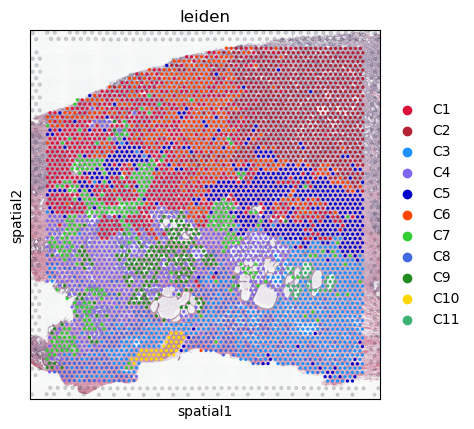

In [5]:
sc.pl.spatial(adata, color='leiden')

In [6]:
df_cellphonedb = ct.pp.ligand_receptor_database(species='human', database='CellPhoneDB_v4.0')
df_cellchat = ct.pp.ligand_receptor_database(species='human', database='CellChat')
print(df_cellphonedb.shape)

(1447, 4)


In [7]:
df_cellphonedb_filtered = ct.pp.filter_lr_database(df_cellphonedb, adata_dis500_cellphonedb, min_cell_pct=0.05)
print(df_cellphonedb_filtered.shape)

(461, 4)


In [8]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500_cellchat, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(319, 4)


In [9]:
print(df_cellphonedb_filtered.head())

                     0            1   2                   3
0                PTGR1        LTB4R NaN  Secreted Signaling
1                PTGR1       LTB4R2 NaN  Secreted Signaling
2  ALOX5_LTC4S_ALOX5AP        OXER1 NaN  Secreted Signaling
3                 BMP7  ACVR1_BMPR2 NaN  Secreted Signaling
4                 BMP5  ACVR1_BMPR2 NaN  Secreted Signaling


In [10]:
print(df_cellchat_filtered.head())

       0              1     2                   3
0  TGFB1  TGFBR1_TGFBR2  TGFb  Secreted Signaling
1  TGFB2  TGFBR1_TGFBR2  TGFb  Secreted Signaling
2  TGFB3  TGFBR1_TGFBR2  TGFb  Secreted Signaling
3  TGFB1  ACVR1B_TGFBR2  TGFb  Secreted Signaling
4  TGFB2  ACVR1B_TGFBR2  TGFb  Secreted Signaling


In [11]:
ct.tl.spatial_communication(adata_dis500_cellphonedb,
    database_name='cellphonedb', df_ligrec=df_cellphonedb_filtered, dis_thr=500, heteromeric=True, pathway_sum=True)
ct.tl.spatial_communication(adata_dis500_cellchat,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=500, heteromeric=True, pathway_sum=True)

In [12]:
adata_dis500_cellphonedb.write_h5ad(f"{trial_name}/outputs/commot_cellphonedb.h5ad")
adata_dis500_cellchat.write_h5ad(f"{trial_name}/outputs/commot_cellchat.h5ad")

In [13]:
adata_dis500_cellphonedb.uns['commot-cellphonedb-info']['df_ligrec'].to_csv(f"{trial_name}/outputs/commot_cellphonedb.csv")
adata_dis500_cellchat.uns['commot-cellchat-info']['df_ligrec'].to_csv(f"{trial_name}/outputs/commot_cellchat.csv")